<a href="https://colab.research.google.com/github/apmoore1/tdsa-paper-details/blob/master/tdsa_paper_details_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.axes_grid1 import host_subplot
import matplotlib.pyplot as plt


matplotlib.rc('font', size=14)
matplotlib.rc('axes', titlesize=14)
matplotlib.rc('axes', labelsize=14)
matplotlib.rc('legend', fontsize=10)
matplotlib.rc('xtick', labelsize=12)
matplotlib.rc('ytick', labelsize=12)
sns.set_style("whitegrid")

# TDSA paper metadata analysis

In this notebook we analysis the metadata that has been collected from 31 Target Dependent Sentiment Analysis (TDSA) papers that have been published after 2013 and before 2019 at the following conferences/workshop 1. ACL, 2. EACL, 3. NAACL, 4. EMNLP, 5. CONLL, 6. COLING, 7. AAAI, 8. TACL, 9. IJCAI, 10. WASSA (workshop). The TSV file that contains this metadata can be found [here in a TSV file](https://github.com/apmoore1/tdsa-paper-details/blob/master/tdsa_paper_details.tsv).

## Loading the data

First we load the data into a pandas dataframe:




In [3]:
tdsa_paper_details_url = ('https://raw.githubusercontent.com/apmoore1/tdsa-'
                          'paper-details/master/tdsa_paper_details.tsv')
tdsa_paper_details_df = pd.read_csv(tdsa_paper_details_url, sep='\t')
tdsa_paper_details_df

,Paper,Paper URL,Year,Venue,Dataset,External Data,Twitter,Non-Twitter,Code URL,Code URL in paper,Tokeniser from paper,Tokeniser from code,Embeddings,Embeddings.1,Embeddings.2,Embeddings.3
0,Target-Dependent Twitter Sentiment Classificat...,https://www.ijcai.org/Proceedings/15/Papers/19...,2015,IJCAI,Dong et al. 2014,UnLablled data for word embeddings,Yes,No,https://github.com/SUTDNLP/NNTargetedSentiment,No,Twokeniser,NaN,Domain sepcific (Twitter) Word2Vec,SSWE,NaN,NaN
1,Gated Neural Networks for Targeted Sentiment A...,https://www.aaai.org/ocs/index.php/AAAI/AAAI16...,2016,AAAI,"Unique 3 sources data set of Dong, Mitchell an...",UnLablled data for word embeddings,Yes,Yes,https://github.com/SUTDNLP/NNTargetedSentiment,Yes,NaN,NaN,Domain sepcific (Twitter) Word2Vec,SSWE,NaN,NaN
2,Neural Networks for Open Domain Targeted Senti...,https://www.aclweb.org/anthology/D15-1073.pdf,2015,EMNLP,Mitchell,UnLablled data for word embeddings,Yes,No,https://github.com/SUTDNLP/OpenTargetedSentiment,Yes,NaN,NaN,Domain sepcific (Twitter) Word2Vec,NaN,NaN,NaN
3,Adaptive Recursive Neural Network for Target-d...,https://www.aclweb.org/anthology/P14-2009.pdf,2014,ACL,Dong et al. 2014,No,Yes,No,NaN,NaN,Twokeniser,NaN,Random intitalised,NaN,NaN,NaN
4,Effective LSTMs for Target-Dependent Sentiment...,https://www.aclweb.org/anthology/C16-1311.pdf,2016,COLING,Dong et al. 2014,UnLablled data for word embeddings,Yes,No,http://ir.hit.edu.cn/~dytang/,Yes,NaN,Twokeniser,SSWE,Glove Twitter,NaN,NaN
5,TDParse: Multi-target-specific sentiment recog...,https://www.aclweb.org/anthology/E17-1046.pdf,2017,EACL,Dong et al. 2014 and Wang et al. 2017,UnLablled data for word embeddings,Yes,No,https://github.com/bluemonk482/tdparse,Yes,NaN,Twokeniser,Domain sepcific (Twitter) Word2Vec,SSWE,NaN,NaN
6,Aspect Level Sentiment Classification with Dee...,https://www.aclweb.org/anthology/D16-1021.pdf,2016,EMNLP,SemEval 2014,No,No,Yes,http://ir.hit.edu.cn/~dytang/,No,NaN,Stanford,Glove 42B,NaN,NaN,NaN
7,Exploiting Document Knowledge for Aspect-level...,https://www.aclweb.org/anthology/P18-2092.pdf,2018,ACL,"SemEval 2014, SemEval 2015, SemEval 2016",Yelp and Amazon reviews,No,Yes,https://github.com/ruidan/Aspect-level-sentiment,Yes,NaN,Whitespace,Glove 840B,NaN,NaN,NaN
8,Attention-based LSTM for Aspect-level Sentimen...,https://www.aclweb.org/anthology/D16-1058.pdf,2016,EMNLP,SemEval 2014,No,No,Yes,NaN,NaN,NaN,NaN,Glove 840B,NaN,NaN,NaN
9,Recurrent Attention Network on Memory for Aspe...,https://www.aclweb.org/anthology/D17-1047.pdf,2017,EMNLP,"SemEval 2014 , Dong et al. 2014, Chinese News ...",No,Yes,Yes,NaN,NaN,NaN,NaN,Glove 42B,Word2Vec CBOW 1.4 billion Chinese Corpus,NaN,NaN


## Papers by year and venue

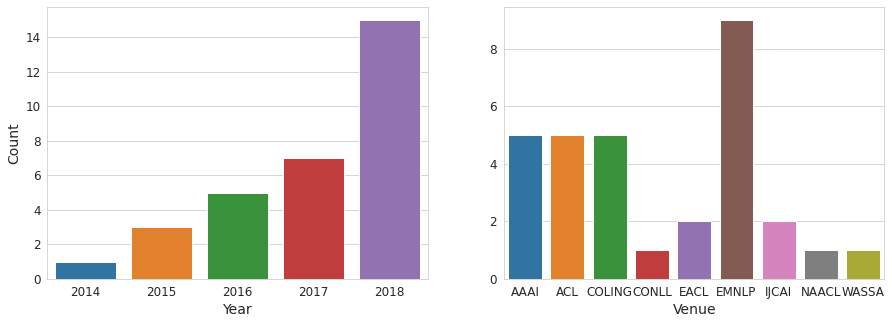

In [129]:
fig, axs = plt.subplots(1, 2, sharey=False, figsize=(15,5))

# Creates the number of papers per year
papers_by_year = tdsa_paper_details_df.groupby('Year').count().reset_index()
papers_by_year['Count'] = papers_by_year['Paper'].copy()
axs[0] = sns.barplot(data=papers_by_year, x='Year', y='Count', ax=axs[0])

# Creates the number of papers per venue
papers_by_venue = tdsa_paper_details_df.groupby('Venue').count().reset_index()
papers_by_venue['Count'] = papers_by_venue['Paper'].copy()
axs[1] = sns.barplot(data=papers_by_venue, x='Venue', y='Count', ax=axs[1])
_ = axs[1].set_ylabel('')

## Codebase statistics
Here we shall look at various codebase statistics

### Contains code and if the code url was in the paper

We shall create a table stating the number of papers that release code and whether the URL to the codebase was in the paper or if it had to be found through searching the internet (Google). Further only codebases that were created by the authors of the paper are included in this table, code reproductions are not reported here.

In [130]:
total_number_papers = tdsa_paper_details_df.count()['Paper']
num_papers_with_no_code = tdsa_paper_details_df['Code URL'].isna().sum()
num_papers_with_code = total_number_papers - num_papers_with_no_code
num_papers_code_in_paper = (tdsa_paper_details_df['Code URL in paper'] == 'Yes').sum()
num_papers_code_not_in_paper = num_papers_with_code - num_papers_code_in_paper

code_stat_dict = {'Code': num_papers_with_code, 
                  'Code in paper': num_papers_code_in_paper, 
                  'Code not in paper': num_papers_code_not_in_paper}
def add_percentage(total_paper_count: int, stat_int: int) -> str:
  percentage = round(((float(stat_int) / float(total_paper_count)) * 100), 2)
  return f'{stat_int} ({percentage}%)'
code_stat_dict = {k: [add_percentage(total_number_papers, v)] 
                  for k, v in code_stat_dict.items()}
code_stat_df = pd.DataFrame(code_stat_dict)
code_stat_df

,Code,Code in paper,Code not in paper
0,16 (51.61%),13 (41.94%),3 (9.68%)


As we can see the majority of papers contain code, of which only 3 of them were not found in the paper.

### Code by year

Are newer papers more likely to release their code?

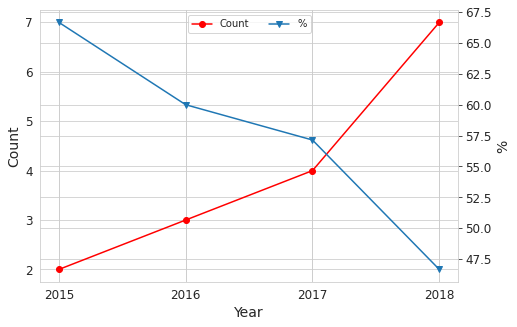

In [136]:
papers_release_code = tdsa_paper_details_df[~tdsa_paper_details_df['Code URL'].isna()]

papers_rc_year_count = papers_release_code.groupby('Year').count()
papers_year_count = tdsa_paper_details_df.groupby('Year').count()
norm_paper_rc_year_count = (papers_rc_year_count['Paper'] / papers_year_count['Paper'])
norm_paper_rc_year_count = norm_paper_rc_year_count.dropna().reset_index()
norm_paper_rc_year_count['%'] = norm_paper_rc_year_count['Paper']
norm_paper_rc_year_count['%'] = norm_paper_rc_year_count['%'] * 100
# Creates the number of papers per year
papers_rc_by_year = papers_rc_year_count.reset_index()
papers_rc_by_year['Count'] = papers_rc_by_year['Paper'].copy()

year = papers_rc_by_year['Year'].tolist()
count = papers_rc_by_year['Count'].tolist()
percent = norm_paper_rc_year_count['%'].tolist()

figure = plt.figure(figsize=(7.5,5))
host = host_subplot(111, figure=figure)
par = host.twinx()

host.set_xlabel("Year")
host.set_ylabel("Count")
par.set_ylabel("%")


host.plot(year, count, 'o-', label='Count', color='red')
par.plot(year, percent, 'v-', label='%')
_ = host.set_xticks(year)
_ = plt.legend(loc=9, ncol=2)


As we can see each year we have more codebases being release with their paper but as proportion of all papers in that year the number of codebases being released is fewer.

### Code by venue

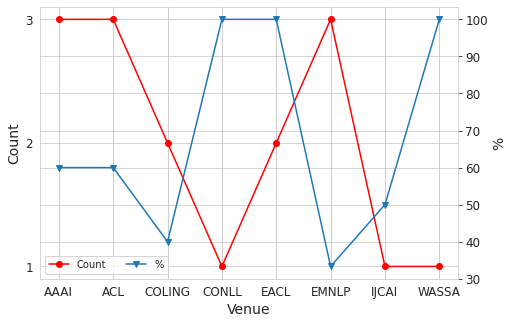

In [135]:
papers_release_code = tdsa_paper_details_df[~tdsa_paper_details_df['Code URL'].isna()]

papers_rc_venue_count = papers_release_code.groupby('Venue').count()
papers_venue_count = tdsa_paper_details_df.groupby('Venue').count()
norm_paper_rc_venue_count = (papers_rc_venue_count['Paper'] / papers_venue_count['Paper'])
norm_paper_rc_venue_count = norm_paper_rc_venue_count.dropna().reset_index()
norm_paper_rc_venue_count['%'] = norm_paper_rc_venue_count['Paper']
norm_paper_rc_venue_count['%'] = norm_paper_rc_venue_count['%'] * 100
# Creates the number of papers per venue
papers_rc_by_venue = papers_rc_venue_count.reset_index()
papers_rc_by_venue['Count'] = papers_rc_by_venue['Paper'].copy()

venue = papers_rc_by_venue['Venue'].tolist()
count = papers_rc_by_venue['Count'].tolist()
percent = norm_paper_rc_venue_count['%'].tolist()

figure = plt.figure(figsize=(7.5,5))
host = host_subplot(111, figure=figure)
_ = host.set_yticks(sorted(set(count)))
par = host.twinx()

host.set_xlabel("Venue")
host.set_ylabel("Count")
par.set_ylabel("%")

venue_index = [i for i in range(len(venue))]
host.plot(venue_index, count, 'o-', label='Count', color='red')
par.plot(venue_index, percent, 'v-', label='%')
_ = plt.xticks(venue_index, venue)
_ = plt.legend(loc=0, ncol=2)

As we can see when papers are at certain venues e.g. EACL and CONLL the papers always have a codebase associated to the paper, but these venues only have 1 and 2 papers at the respective venues. Places like AAAI and ACL seem to have a good balance between number of papers and the likliehood of the them having a codebase, whereas EMNLP has lots of TDSA papers but relatively few have codebases associated with them.

# Overall

TDSA is an expanding sub-area of sentiment analysis as some more papers are coming out each year. However these statistics indicate that in relative terms as more papers are coming out fewer of them are going to release the code associated with the paper.